# Biaxial Bending Diagram

This example demonstrates how to generate biaxial bending diagrams. We start by importing the necessary modules.

In [1]:
import numpy as np
from concreteproperties.material import Concrete, Steel
from concreteproperties.stress_strain_profile import (
    ConcreteLinear,
    RectangularStressBlock,
    SteelElasticPlastic,
)
from sectionproperties.pre.library.primitive_sections import rectangular_section
from concreteproperties.pre import add_bar_rectangular_array
from concreteproperties.concrete_section import ConcreteSection
from concreteproperties.results import BiaxialBendingResults

## Assign Materials
The materials used in this example will be 40 MPa concrete and 500 MPa steel, specified in accordance with AS 3600:2018.

In [2]:
concrete = Concrete(
    name="40 MPa Concrete",
    density=2.4e-6,
    stress_strain_profile=ConcreteLinear(elastic_modulus=32.8e3),
    ultimate_stress_strain_profile=RectangularStressBlock(
        compressive_strength=40,
        alpha=0.79,
        gamma=0.87,
        ultimate_strain=0.003,
    ),
    alpha_squash=0.85,
    flexural_tensile_strength=3.8,
    colour="lightgrey",
)

steel = Steel(
    name="500 MPa Steel",
    density=7.85e-6,
    stress_strain_profile=SteelElasticPlastic(
        yield_strength=500,
        elastic_modulus=200e3,
        fracture_strain=0.05,
    ),
    colour="grey",
)

## Create Geometry and Concrete Section
In this example we'll use the geometry from the [Moment Curvature Analysis](moment_curvature.ipynb#Create-Reinforced-Concrete-Geometry) example, without the circular void.

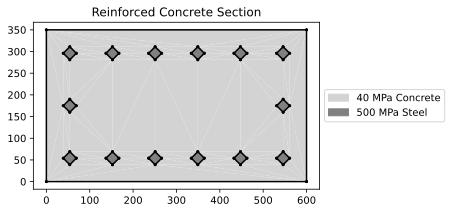

<AxesSubplot:title={'center':'Reinforced Concrete Section'}>

In [3]:
col = rectangular_section(d=350, b=600, material=concrete)

# add bars to column
geom = add_bar_rectangular_array(
    geometry=col,
    area=450,
    material=steel,
    n_x=6,
    x_s=492 / 5,
    n_y=3,
    y_s=121,
    anchor=(54, 54),
    exterior_only=True,
)

conc_sec = ConcreteSection(geom)
conc_sec.plot_section()

## Biaxial Bending Diagram
We can create a biaxial bending diagram by calling the ``biaxial_bending_diagram()`` method. We first create a biaxial bending diagram for pure bending, i.e. no axial force.

In [4]:
bb_res = conc_sec.biaxial_bending_diagram()

Output()

We can plot the biaxial bending diagram by calling the plot_diagram() method.

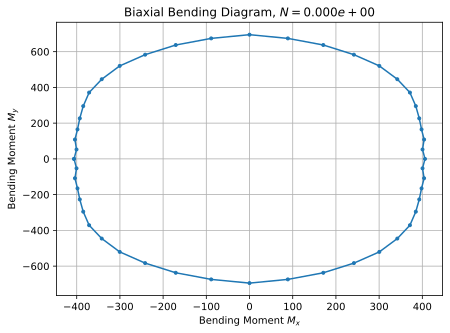

<AxesSubplot:title={'center':'Biaxial Bending Diagram, $N = 0.000e+00$'}, xlabel='Bending Moment $M_x$', ylabel='Bending Moment $M_y$'>

In [5]:
bb_res.plot_diagram()

Say we know the column has an axial force of 1000 kN, we can generate a biaxial bending diagram for this case by passing this to the parameter ``n``. 

Output()

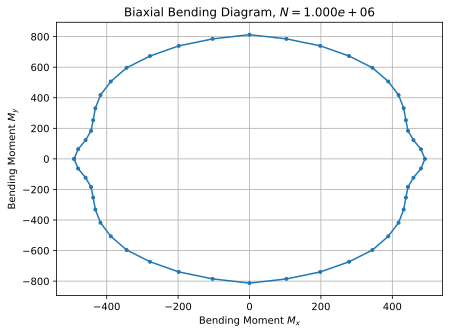

<AxesSubplot:title={'center':'Biaxial Bending Diagram, $N = 1.000e+06$'}, xlabel='Bending Moment $M_x$', ylabel='Bending Moment $M_y$'>

In [6]:
bb_res = conc_sec.biaxial_bending_diagram(n=1000e3)
bb_res.plot_diagram()

## Plotting Multiple Diagrams
We can also plot multiple diagrams at once by using the ``BiaxialBendingResults.plot_multiple_diagrams()`` class method. Here we will generate biaxial bending diagrams with varying axial load from pure bending up to the decompression point. We start by examining the moment interaction diagrams to find the decompression point.

Output()

Output()

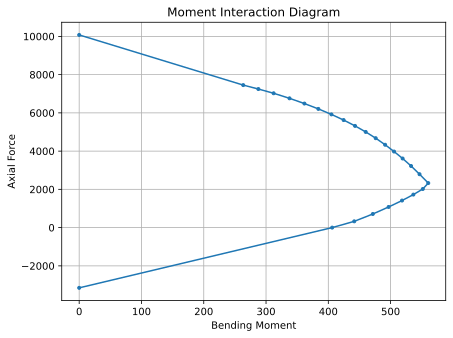

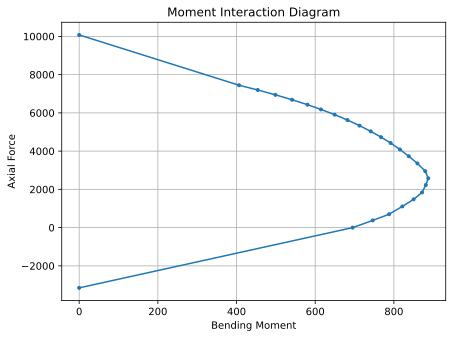

Decompression point for M_x is N = 7452.19 kN
Decompression point for M_y is N = 7444.80 kN


In [7]:
mi_x = conc_sec.moment_interaction_diagram()
mi_y = conc_sec.moment_interaction_diagram(theta=np.pi / 2)
mi_x.plot_diagram()
mi_y.plot_diagram()
print(f"Decompression point for M_x is N = {mi_x.n[1] / 1e3:.2f} kN")
print(f"Decompression point for M_y is N = {mi_y.n[1] / 1e3:.2f} kN")

Let's generate 11 biaxial bending curves from pure bending ($N=0$ kN) to close to the decompression point ($N=7400$ kN).

In [8]:
n_list = np.linspace(0, 7400e3, 11)
biaxial_results = []

for n in n_list:
    biaxial_results.append(conc_sec.biaxial_bending_diagram(n=n))

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Now that we have the results, we can plot all the diagrams on a 3D plot!

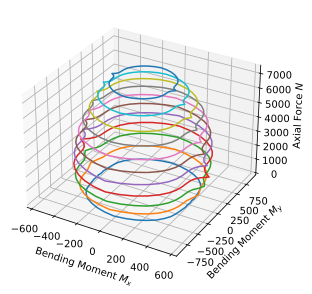

<Axes3DSubplot:xlabel='Bending Moment $M_x$', ylabel='Bending Moment $M_y$'>

In [9]:
BiaxialBendingResults.plot_multiple_diagrams(biaxial_results)